In [1]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import os 
%matplotlib inline

In [2]:
img1 = cv2.imread("test_images/640_output_zh1_frame_0339.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("test_images/640_output_zh1_frame_0340.png", cv2.IMREAD_GRAYSCALE)
stack = np.hstack((img1, img2))

0.98332275390625


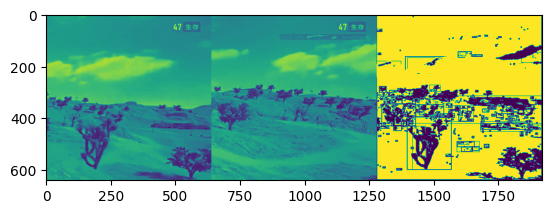

In [5]:
diff_img = cv2.absdiff(img1, img2)
change_perc = np.count_nonzero(diff_img) / diff_img.size

print(change_perc)

ret, thresh = cv2.threshold(diff_img, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
contours, heir_a = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
for _con in contours:
    box = cv2.boundingRect(_con)
    cv2.rectangle(img2, box, (255,0,0))
final_img = np.hstack((stack, thresh))
# print(len(contours))
# bgr_C = cv2.cvtColor(contours, cv2.COLOR_GRAY2BGR)
plt.imshow(final_img)
plt.show()